In [1]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
from typing import Tuple
from experiment_tools import *

In [9]:
align = extract_data("D:/data/2023/20230322/pol/S12SL4/p0/df_al_S12SL4_p0_20230322.csv")
cross = extract_data("D:/data/2023/20230322/pol/S12SL4/p0/df_cr_S12SL4_p0_20230322.csv")
tT = cross / (align + cross)

In [7]:
tT[tT>=1] = np.finfo(np.float64).smallest_normal


In [ ]:
birefringence, absorption = get_optical_activity(tT, 10)

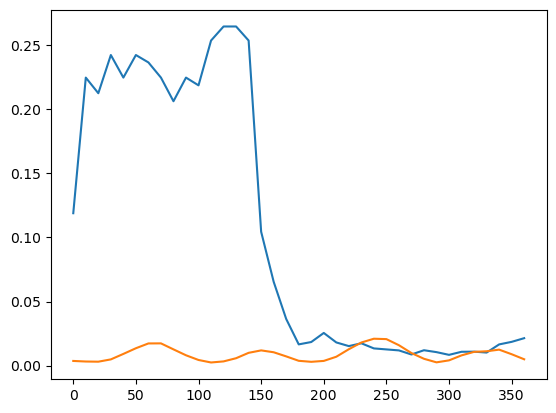

In [70]:
condition = tT[:, np.std(tT, axis=0) > np.amax(np.std(tT, axis=0)) - 0.01][:, 0]
plt.plot(np.arange(0, 361, 10), (tT[:, np.std(tT, axis=0) > np.amax(np.std(tT, axis=0)) - 0.01][:, 0]))
plt.plot(np.arange(0, 361, 10), (tT[:, birefringence > 0.7])[:, 1])

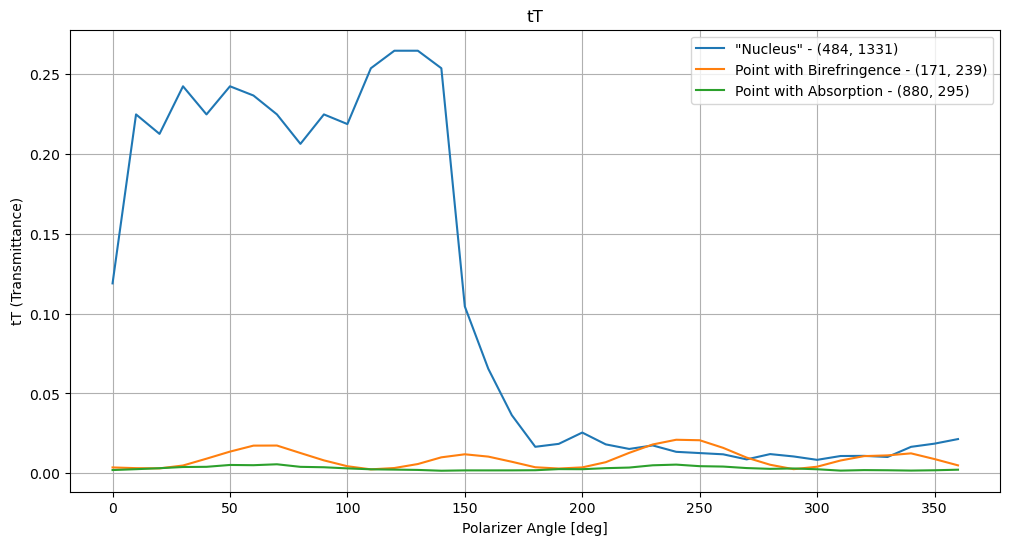

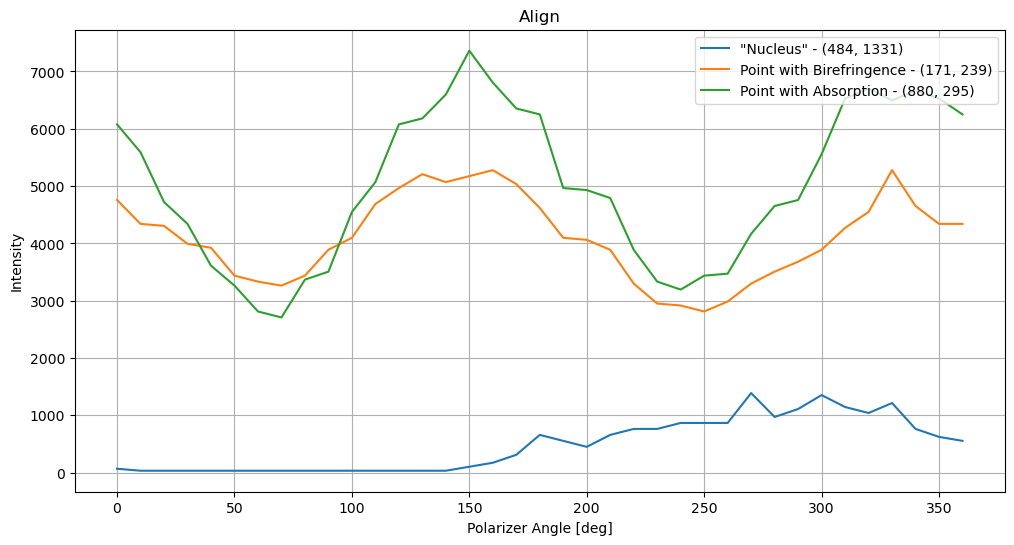

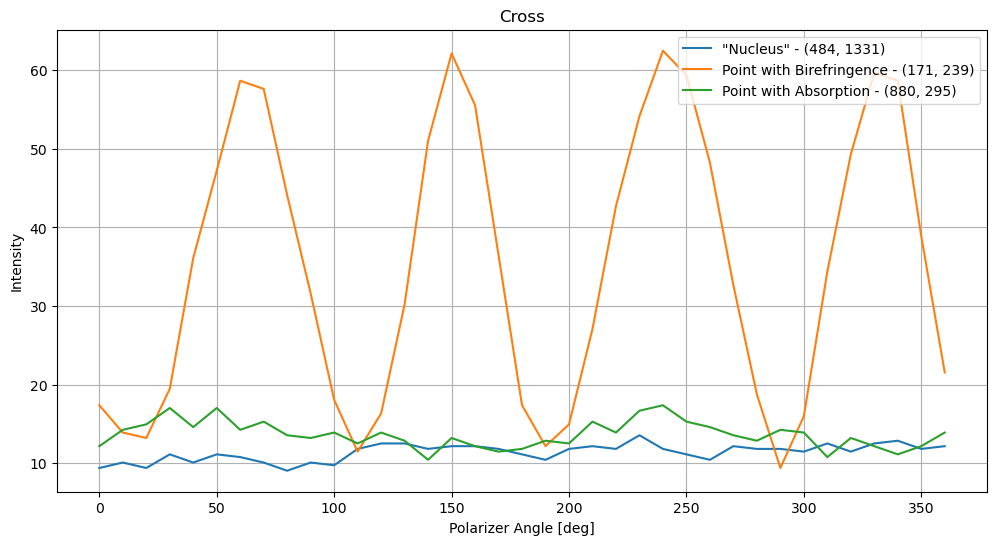

In [95]:
plt.figure(figsize=(12, 6))
plt.plot(
    np.arange(0, 361, 10),
    (tT[:, np.std(tT, axis=0) > np.amax(np.std(tT, axis=0)) - 0.01][:, 0]),
    label='"Nucleus" - (484, 1331)',
)
plt.plot(
    np.arange(0, 361, 10),
    (tT[:, birefringence > 0.7])[:, 1],
    label="Point with Birefringence - (171, 239)",
)
plt.plot(
    np.arange(0, 361, 10),
    (tT[:, np.logical_and(absorption > 0.5, birefringence < 0.3)])[:, 10000],
    label="Point with Absorption - (880, 295)",
)
plt.title("tT")
plt.xlabel("Polarizer Angle [deg]")
plt.ylabel("tT (Transmittance)")
plt.grid()
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(
    np.arange(0, 361, 10),
    (align[:, np.std(tT, axis=0) > np.amax(np.std(tT, axis=0)) - 0.01][:, 0]),
    label='"Nucleus" - (484, 1331)',
)
plt.plot(
    np.arange(0, 361, 10),
    (align[:, birefringence > 0.7])[:, 1],
    label="Point with Birefringence - (171, 239)",
)
plt.plot(
    np.arange(0, 361, 10),
    (align[:, np.logical_and(absorption > 0.5, birefringence < 0.3)])[:, 10000],
    label="Point with Absorption - (880, 295)",
)
plt.title("Align")
plt.xlabel("Polarizer Angle [deg]")
plt.ylabel("Intensity")
plt.grid()
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(
    np.arange(0, 361, 10),
    (cross[:, np.std(tT, axis=0) > np.amax(np.std(tT, axis=0)) - 0.01][:, 0]),
    label='"Nucleus" - (484, 1331)',
)
plt.plot(
    np.arange(0, 361, 10),
    (cross[:, birefringence > 0.7])[:, 1],
    label="Point with Birefringence - (171, 239)",
)
plt.plot(
    np.arange(0, 361, 10),
    (cross[:, np.logical_and(absorption > 0.5, birefringence < 0.3)])[:, 10000],
    label="Point with Absorption - (880, 295)",
)
plt.title("Cross")
plt.xlabel("Polarizer Angle [deg]")
plt.ylabel("Intensity")
plt.grid()
plt.legend(loc='upper right')
plt.show()



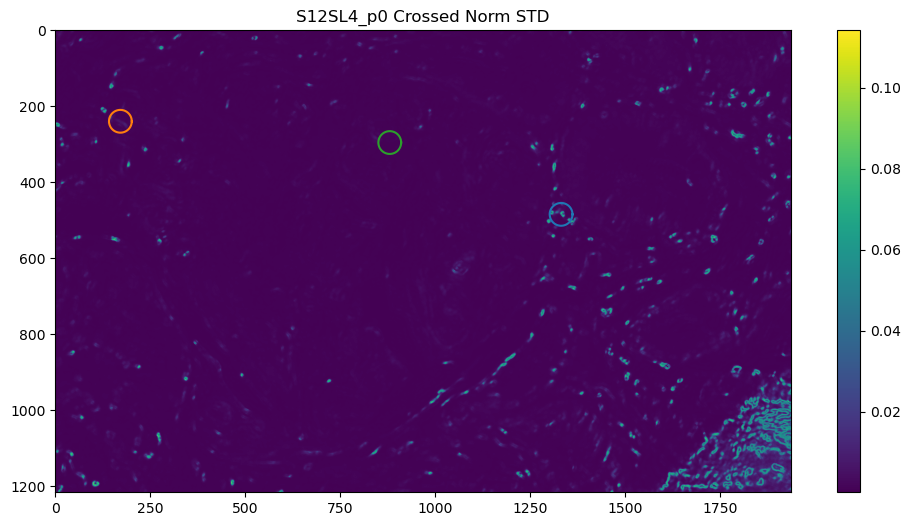

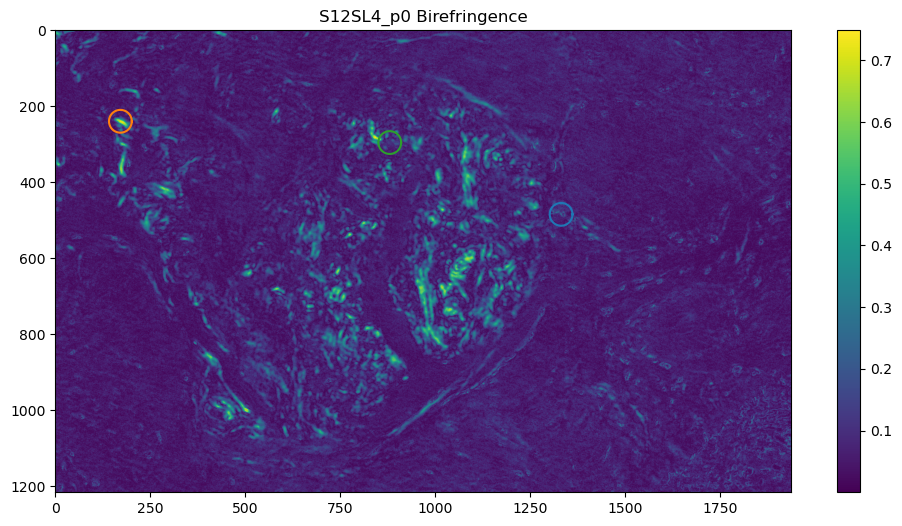

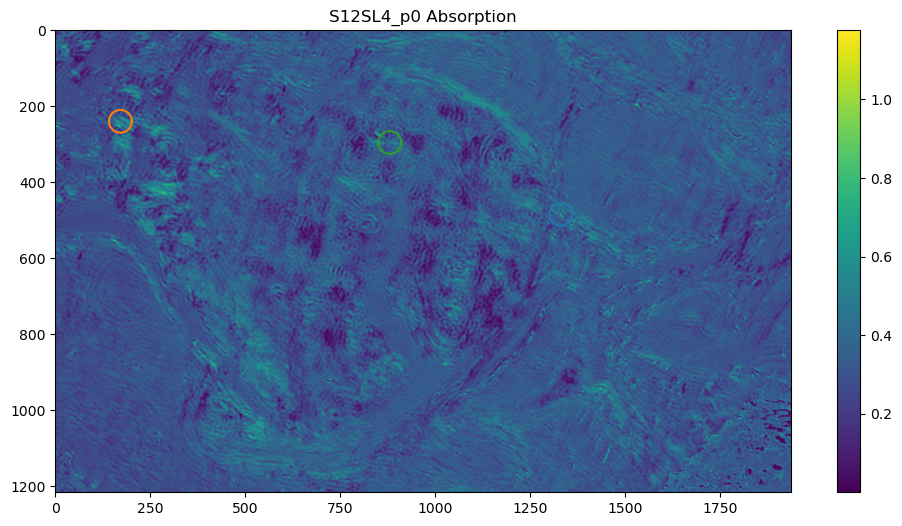

In [92]:
from matplotlib.patches import Circle

plt.figure(figsize=(12, 6), dpi=100)
plt.imshow(np.std(tT, axis=0))
plt.colorbar()
plt.title("S12SL4_p0 Crossed Norm STD")

theta = np.linspace(0, 2 * np.pi, 200)
r = 30

plt.plot(
    r * np.cos(theta) + 1331,
    r * np.sin(theta) + 484,
    color="C0",
    linewidth=1.5,
    label='"Nucleus" - (1331, 484)',
)
plt.plot(
    r * np.cos(theta) + 171,
    r * np.sin(theta) + 239,
    color="C1",
    linewidth=1.5,
    label="Point with Birefringence - (171, 239)",
)
plt.plot(
    r * np.cos(theta) + 880,
    r * np.sin(theta) + 295,
    color="C2",
    linewidth=1.5,
    label="Point with Absorption - (880, 295)",
)
plt.show()

plt.figure(figsize=(12, 6), dpi=100)
plt.imshow(birefringence)
plt.colorbar()
plt.title("S12SL4_p0 Birefringence")

plt.plot(
    r * np.cos(theta) + 1331,
    r * np.sin(theta) + 484,
    color="C0",
    linewidth=1.5,
    label='"Nucleus" - (1331, 484)',
)
plt.plot(
    r * np.cos(theta) + 171,
    r * np.sin(theta) + 239,
    color="C1",
    linewidth=1.5,
    label="Point with Birefringence - (171, 239)",
)
plt.plot(
    r * np.cos(theta) + 880,
    r * np.sin(theta) + 295,
    color="C2",
    linewidth=1.5,
    label="Point with Absorption - (880, 295)",
)
plt.show()

plt.figure(figsize=(12, 6), dpi=100)
plt.imshow(absorption)
plt.colorbar()
plt.title("S12SL4_p0 Absorption")

plt.plot(
    r * np.cos(theta) + 1331,
    r * np.sin(theta) + 484,
    color="C0",
    linewidth=1.5,
    label='"Nucleus" - (1331, 484)',
)
plt.plot(
    r * np.cos(theta) + 171,
    r * np.sin(theta) + 239,
    color="C1",
    linewidth=1.5,
    label="Point with Birefringence - (171, 239)",
)
plt.plot(
    r * np.cos(theta) + 880,
    r * np.sin(theta) + 295,
    color="C2",
    linewidth=1.5,
    label="Point with Absorption - (880, 295)",
)
plt.show()


In [5]:
angle = np.linspace(0, 360, 36, endpoint=False)
angle = np.transpose(np.vstack([angle for i in range(4)]))

plt.figure(figsize=(12,6))
plt.plot(angle, tT[:, birefringence > 1])
plt.title('tT')
plt.xlabel("Polarizer Angle [deg]")
plt.ylabel("tT (Transmittance)")
plt.grid()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(angle, align[:, birefringence > 1])
plt.title('align')
plt.xlabel("Polarizer Angle [deg]")
plt.ylabel("Intensity")
plt.grid()
plt.show()

NameError: name 'birefringence' is not defined

<Figure size 1200x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(12,6))
plot_fft(tT[:-1, birefringence > 1][:, 2], 360/tT.shape[0])
plt.title("FFT of tT - strange behaviour")
plt.show()

plt.figure(figsize=(12,6))
plt.plot(angle, tT[:, 1067, 1871], 'b.-')
plt.title('tT - strange behaviour')
plt.xlabel("Polarizer Angle [deg]")
plt.ylabel("tT (Transmittance)")

plt.grid()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(angle, (align)[:, birefringence > 1][:, 2], 'b.-')
plt.title('Align - strange behaviour')
plt.xlabel("Polarizer Angle [deg]")
plt.ylabel("Intensity")
plt.grid()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(angle, (cross)[:, birefringence > 1][:, 2], 'b.-')
plt.title('Cross - strange behaviour')
plt.xlabel("Polarizer Angle [deg]")
plt.ylabel("Intensity")
plt.grid()
plt.show()


In [ ]:
# good birefringence
plt.figure(figsize=(12,6))
plot_fft(tT[:-1,300, 500], 360/tT.shape[0])
plt.title("FFT of tT - good birefringence")
plt.show()

plt.figure(figsize=(12,6))
plt.plot(angle, tT[:, 300, 500], 'b.-')
plt.title('tT - good birefringence')
plt.xlabel("Polarizer Angle [deg]")
plt.ylabel("tT (Transmittance)")
plt.grid()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(angle, (align)[:, 300, 500], 'b.-')
plt.title('Align - good birefringence')
plt.xlabel("Polarizer Angle [deg]")
plt.ylabel("Intensity")
plt.grid()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(angle, (cross)[:, 300, 500], 'b.-')
plt.title('Cross - good birefringence')
plt.xlabel("Polarizer Angle [deg]")
plt.ylabel("Intensity")
plt.grid()
plt.show()


In [ ]:
fig, ax  = plt.subplots(figsize=(12,6))
ax.plot(angle[:, 0], tT_mean(cross), label='cross')
ax.plot(angle[:, 0], tT_mean(align)/120, label='align [div by 120]')
ax.plot(angle[:, 0], tT_mean(tT) * 30000, label='tT [mult by 30000]')
# plt.plot(tT_mean(align + cross)/120)
ax.set_xlabel("Polarizer Angle [deg]")
ax.set_ylabel("Intensity")
ax.set_title("Comparison Plots of Average Across Entire Image")
ax.legend()
ax.grid()
plt.show()